<h1>Language Models</h1>

<h1>Overview</h1>

This post aims to explain what a language model is and how we can build a simple one. You have likely heard or read news about Language Models, especially Large Language Models (or LLMs for short), frequently these days since the release of <b>ChatGPT</b>. 

<b>ChatGPT</b>, which is built on top of LLMs like GPT-4, has become a notable example in the field. In this notebook, I will show you how to construct a language model from scratch. As we proceed step by step, I'll also discuss some considerations and challenges associated with building and training such models, as well as how the experts in the field have addressed them.

<b>Should I build my own language model?</b>

Probably not! Building a language model, especially a large one, from scratch is often not practical for most individuals or even small teams. This is because training such models requires extensive computational resources and large, high-quality datasets. Instead, many people opt to use pre-trained models and fine-tune them for specific tasks. However, even fine-tuning can be computationally expensive and may not yield good results if your dataset is small due to the risk of overfitting.

As alternatives, several strategies exist:
<ul>
    <li><b>Retrieval-augmented Generation (RAG)</b>: Merges pre-trained models with external databases, letting the model fetch relevant external data when needed.</li>
    <li><b>Few-shot Learning</b>: Guides a model to generalize tasks using only a handful of examples provided in the input.</li>
    <li><b>In-context Learning</b>: Leverages the model's ability to adapt based on the context within the input prompt.</li>
</ul>
These methods offer a more resource-efficient way to tap into the power of large language models. Please note that this post primarily centers around constructing a toy language model. In upcoming posts, I will delve into these alternative methodologies.

<b>Why should I then bother to learn how language models are built? </b>

Understanding the mechanics of language models can empower you to use them more effectively. When you're implementing these models in real-world scenarios, having a solid foundational knowledge will help you troubleshoot issues, optimize performance, and make informed decisions about which model to use and how to adapt it for your specific needs.

<h3>What is a language model?</h3>

A language model is a probability distribution over a sequence of tokens drawn from a specific vocabulary. For example, if we consider the vocabulary to be the English language, then a sequence of tokens could be the sentence 'The sky is blue.'

<b>What does it mean when we say, 'A language model is a probability distribution,' and how can we utilize this concept?</b>

Mathematically speaking, considering the vocabulary $V$, for every sequence of tokens $x_1,...x_m$, where each token $x_i \in V $, a language model is defined by the probability distribution $p(x_1,x_2,...,x_m)$. In other words, $p(x_1,x_2,...,x_m)$ tells us how likely a sequence of tokens is to be observed. Of cource, we expect that this probability distribution assigns a high probability to correct sequences while giving small probability to incorrect or meaningless sequences. For example, we expect $p(.)$ to give a higher probability to 'The sky is blue' in comparison to 'A sky was the blue'

Now let's delve into some mathematics to see what we can drive from $p(.)$.

Using the chain rule of probability, we can rewrite $p(x_1,x_2,...,x_m)$ as follows:
$$p(x_{1:m})=p(x_1)p(x_2∣x_1)p(x_3∣x_1,x_2)⋯p(x_m∣x_{1:m−1})=\prod_{i=1}^m p(x_i∣x_{1:i−1}).$$
Here, each term in the multiplication represents the conditional probability of the current token given the previous tokens. 

Knowing the conditional probability $p(x_i∣x_{1:i−1})$ means that given the sequence $x_1,...,x_{i−1}$, we can sample the next token $x_i$ from the vocabulary, and then sample another one, and so on. Sampling the tokens one after another implies that we are <b><i>generating</i></b> a sequence of vocabularies or in other words, we are <b><i>generating</i></b> a text. 

<b>Now, one key question to ask is, 'Do we know this probability distribution?' if not, Can we estimate it? </b>    
The answer to the first question is 'No! We do not.' The answer to the latter one is 'Yes! We can.' 

Historically, before the rise of advanced NLP techniques, n-gram language modeling was a popular approach to approximate these probabilities. An n-gram is a contiguous sequence of 'n' items from a given sample of text. For example, in a bigram model (where n=2), we'd use the probability of a word appearing after its preceding word to estimate $p(x_i∣x_{1:i−1})$. In a trigram model (where n=3), we use the previous two words. These models were constructed by analyzing vast amounts of text and <b>counting</b> the frequencies of word sequences. However, n-gram models have their limitations, especially when dealing with long dependencies between words, since they only consider a fixed number of preceding words.

This is where Deep Neural Networks, especially Transformers, come to the rescue. These modern architectures, which are mainly based on Transformers, are designed to capture broader and more nuanced textual contexts than traditional n-gram models. Using self-attention mechanisms, which are the key componenents of the Transformer architectures, they consider relationships between all words in a sentence, enabling them to recognize long-range dependencies. Moreover, they do not just count word sequences; they learn abstract patterns and deep structures within the language. This combination of wider context understanding and depth of learning allows them to more accurately reflect and generate the multifaceted intricacies of natural language can consider much wider contexts and more abstract patterns in the data, making them better suited for estimating the intricate probability distributions that govern natural language.

<b>Summary</b>
<ul>
  <li>A language model is a probability distribution over a sequence of tokens drawn from a specific vocabulary.</li>
  <li>Mathematically, this probability distribution is defined by $p(x_1,x_2,...,x_m) =\prod_{i=1}^m p(x_i∣x_1:i−1).$</li>
  <li>We do not know this probability distribution but we can estimate by building a special deep neural network.</li>
    <li>The model, which estimates the language model, can then be utilized to generate meaningful texts.</li>
</ul>

<h3>Analyzing Sequential Data Using Deep Neural Networks</h3>


<h3>Recurrent Neural Networks (RNNs)</h3>

NLP tasks, such as Language Modeling and Machine Translation, require analyzing data sequentially. Traditional feedforward neural networks are not capable of handling dependencies in sequential data, as they lack any memory of previous inputs. This is where RNNs (Recurrent Neural Networks), and later on, Transformers, come into the scene. Unlike traditional feedforward networks, RNNs are able to maintain a hidden state that acts as a form of memory, enabling them to capture information about previous inputs in the sequence.

This characteristic makes RNNs well-suited for various tasks. For example, they are ideal for text generation and machine translation. Due to their ability to model temporal dependencies, they can be used for forecasting stock prices, weather, and other time-dependent phenomena. The sequential nature of audio signals makes RNNs valuable for speech recognition tasks. Additionally, they can analyze sequences of video frames to recognize actions or gestures over time.

However, traditional RNNs suffered from problems like vanishing or exploding gradients, making them difficult to train on long sequences. This led to the development of more advanced types of RNNs, such as Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRUs), which are designed to better capture long-range dependencies in sequential data. While LSTMs and GRUs are designed to capture long-range dependencies, they may still be challenged by the inherent sequential nature of their processing, limiting their parallelization efficiency and potentially affecting their ability to model extremely complex dependencies. In contrast, Transformers use a self-attention mechanism that allows them to directly model relationships between all parts of the input sequence, regardless of distance. This parallel processing enables more efficient training and can provide Transformers with a significant advantage in tasks requiring a nuanced understanding of context and long-range interactions between elements in a sequence.

<h3>Transformers</h3>

Transformers are a type of neural network architecture introduced by Vaswani et al. in the paper "<a href=https://arxiv.org/abs/1706.03762>Attention is All You Need</a>". As opposed to sequential models like RNNs, LSTMs, and GRUs, Transformers are able to process an entire sequence of data simultaneously rather than sequentially.
The core of the Transformer architecture is the attention mechanism, which allows the model to weigh the importance of different parts of the input (e.g. different tokens in a sequence of tokens) when processing each individual element (e.g., a token). This enables the Transformer to capture complex relationships and dependencies between all parts of the input, regardless of their distance from each other in the sequence.

A typical Transformer model consists of an encoder and a decoder, each composed of several layers of self-attention and feed-forward neural networks. The encoder processes the input sequence (e.g. an English sentence), and the decoder generates the output (e.g. the equivalent French translation of the input), with attention mechanisms at each layer allowing the model to focus on different parts of the input as needed

The parallel processing nature of the Transformer architecture makes it highly efficient for training on modern GPUs, and its flexibility and scalability have led to its adoption in a wide variety of natural language processing tasks, including machine translation, text generation, and language understanding. Transformers have served as the foundation for many state-of-the-art models, such as BERT and GPT series

In this post, I will not be delving further into the architecture of Transformers. Interested readers can refer to <a href='http://jalammar.github.io/illustrated-transformer/'>this post</a> by Jay Alammar, which provides an amazing explanation and illustration of Transformers.

<b>Summary</b>
<ul>
  <li>Traditional feedforward neural networks are not capable of handling dependencies in sequential data, as they lack any memory of previous inputs. 
  <li>RNNs are able to maintain a hidden state that acts as a form of memory, enabling them to capture information about previous inputs in the sequence.</li>
  <li>Traditional RNNs suffered from problems like vanishing or exploding gradients, making them difficult to train on long sequences. </li>
    <li>LSTMs and GRUs are more advanced types of RNNs which are designed to better capture long-range dependencies in sequential data. </li>
    <li>LSTMs and GRUs still suffer from the inherent sequential nature of their processing, which limits their parallelization efficiency and potentially affects their ability to model extremely complex dependencies. </li>
    <li>Transformers, as opposed to RNNs, LSTMs, and GRUs, are able to process an entire sequence of data in parallel rather than sequentially.</li>
    <li>The core of the Transformers is the attention mechanism which enables the Transformers to capture complex relationships and dependencies between all parts of the input, regardless of their distance from each other in the sequence.</li>
</ul>

<h3>Building and Training a Language Model </h3>


Now that we have learned what a language model is theoretically, it is time to gain some hands-on experience by implementing a real yet simple language model. 

Here is the roadmap:
<ul>
    <li>First, we will start by building a simple language model using RNNs. Although modern language models often use Transformers at their cores, I believe that exploring both approaches will be a valuable learning experience.
</li>
    <li>Second, I will alter the model to use Transformers instead. 
</li>
    <li>Third, I will further expand the model by introducing the concept of Mixture of Experts and Switch Transformers.  </li>
    <li>Lastly, using a publicly available dataset, I will demonstrate how to train the final model.</li>
</ul>


<h3>An RNN based Langauage Model</h3>

In [1]:
import torch.nn as nn

In [2]:
class LanguageModelRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size):
        super(LanguageModelRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.rnn(embedded)
        # Use the entire sequence of outputs
        output = self.fc(output)
        return output

The above LanguageModelRNN class has a very simple architecture, consisting only one layer of LSTM and one fully connected layer. 
Please note that the output size is implicitly determined by the vocab_size parameter when setting up the final fully connected layer (self.fc). Since we're building a language model, the output dimension is naturally the size of the vocabulary. That is, for each token in the input sequence, the model predicts a distribution over the entire vocabulary for the next token. This is why the fully connected layer uses hidden_size as the input dimension and vocab_size as the output dimension.

<h3>An Transformer based Langauage Model</h3>

Earlier in this post, I discussed a few limitations of RNNs and how transformers address them. Additionally, State-of-the-art language models, such ascLLAMA and GPT models, mainly use transformers in their architectures. Thus, I will Replace the LSTM layer with a transformer encoder. The transformer encoder takes a sequence of embeddings and returns a sequence of encoded vectors.

In [3]:
from torch.nn import TransformerEncoder, TransformerEncoderLayer

In [4]:
class LanguageModelTransform(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_heads, num_layers):
        super(LanguageModelTransform, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Transformer layer
        encoder_layers = TransformerEncoderLayer(embedding_dim, num_heads, hidden_size)
        self.transformer_encoder = TransformerEncoder(encoder_layers, num_layers)

        self.fc = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        output = self.transformer_encoder(embedded) # Transform through the transformer encoder
        output = self.fc(output) # Final fully connected layer
        return output


Please note that, in reality, SOTA language models have billions of parameters. This is why they are often referred to as Large Language Models (LLMs). Training such models also requires tremendous computational power. I will discuss considerations for training these LLMs in a subsequent. However, in the following sections, I will demonstrate how to train our small-scale language model.

<h2>Training</h2>

To train a language model, we first define a specific task. By repeatedly performing this task over several epochs, the model adjusts its parameters to improve its performance on that task. The task we utilize for training our language model is: "Given a sequence of tokens, predict the next token. 

Before starting the training, we should prepare the dataset.

<h3>Dataset and Preprocessing</h3>

In this article, we'll leverage a publicly available dataset to train our concise language model. There are several datasets available for such tasks, including Wikitext-103, Penn Treebank (PTB), Text8, and Gutenberg. For our purposes, we'll utilize the Penn Treebank (PTB) dataset, accessible via PyTorch's built-in datasets.

For NLP tasks, it's essential to break down input text into a series of tokens, a process known as tokenization. While there are various methods to achieve this, SentencePiece and Byte-Pair Encoding (BPE) stand out as advanced tokenization techniques adept for many NLP tasks. I've delved into these methods in a <a href=https://github.com/lsafarne/NLPBites.github.io/blob/main/text_tokenization.ipynb>previous post</a>. To ensure clarity and brevity in this article, I recommend readers interested in a deeper understanding to refer to that post.

In [5]:
import sentencepiece as spm
from torchtext.datasets import PennTreebank

# Load the trained SentencePiece model
sp = spm.SentencePieceProcessor()
sp.load('models/SentencePiecePennTree.model')

True

After loading the SentencePiece tokenizer model, we'll utilize PyTorch's Dataset and DataLoader classes. In PyTorch, the Dataset class provides a consistent interface for accessing our data, while the DataLoader class allows efficient and parallelized loading of the data, simplifying the batching process.

In [6]:
from torch.utils.data import DataLoader, Dataset

class PTBDataset(Dataset):
    def __init__(self, data, seq_len=30):
        tokens = sp.encode_as_ids(data)
        self.data = [tokens[i:i+seq_len] for i in range(len(tokens) - seq_len)]
        self.targets = [tokens[i+1:i+seq_len+1] for i in range(len(tokens) - seq_len)]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx]), torch.tensor(self.targets[idx])

def get_raw_text_from_dataset(dataset):
    res = ''
    for sentence in dataset:
        res = res + sentence
    return res

train_raw_text = get_raw_text_from_dataset(PennTreebank(split='train'))
valid_raw_text = get_raw_text_from_dataset(PennTreebank(split='valid'))

train_dataset = PTBDataset(train_raw_text)
valid_dataset = PTBDataset(valid_raw_text)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64)

The code inside the PTBDataset class is designed to preprocess text data for training a language model. Let's break down the code step by step:
<ul>
<li>tokens = sp.encode_as_ids(data)
    <br/>
    This line uses the SentencePiece model (referred to by sp) to convert the input text data (a long string of text) into a list of integer tokens.
    For instance, the text "Hello world" might get converted to something like [320, 5432] depending on the SentencePiece model's vocabulary.
</li>
<li> self.data = [tokens[i:i+seq_len] for i in range(len(tokens) - seq_len)]
    <br/>
    This line is generating a list of sequences from the tokens list. Each sequence has a length of seq_len.
    These sequences serve as the input to the language model. <span style="background-color: yellow;">The idea is to use sequences of tokens to predict the next token in the sequence.</span>
    For example, if tokens = [1, 2, 3, 4, 5, 6, 7, 8] and seq_len = 5, then self.data would be [[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7]].
</li>
<li>self.targets = [tokens[i+1:i+seq_len+1] for i in range(len(tokens) - seq_len)]
    <br/>
    This line creates the target sequences. These are the tokens the model should predict given the input sequences.
    The target for each input sequence is shifted by one token, as the goal is to predict the next token in the sequence.
    Continuing the example above, if self.data has sequences [[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7]], then self.targets would be [[2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8]].
</li>
</ul>

<h3>Training Loop</h3>

In [16]:
import torch
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize the model
vocab_size = sp.get_piece_size()
model = LanguageModelTransform(vocab_size, embedding_dim=256, hidden_size=512, num_heads=4, num_layers=2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Lists for storing losses for each epoch
train_losses = []
val_losses = []

num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)
        outputs = model(data)
        loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        if batch_idx % 500 == 0:
            print(f"Epoch: {epoch+1} | Batch: {batch_idx+1} | train_Loss: {loss.item()}")
            train_losses.append(loss.item())
            
    # Calculate the average training loss for this epoch
    avg_train_loss = train_loss / len(train_loader)
    

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_idx, (data, targets) in enumerate(valid_loader):
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            valid_loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
            val_loss += valid_loss.item()
            if batch_idx % 100 == 0:
                print(f"Epoch: {epoch+1} | Batch: {batch_idx+1} | validation_Loss: {valid_loss.item()}")
                val_losses.append(valid_loss)
        # Calculate the average validation loss for this epoch
        avg_val_loss = val_loss / len(valid_loader)
    print(f"After epoch {epoch+1}: Average Train Loss: {avg_train_loss:.4f}, Average Validation Loss: {avg_val_loss:.4f}")


Epoch: 1 | Batch: 1 | train_Loss: 9.090035438537598
Epoch: 1 | Batch: 501 | train_Loss: 3.9951939582824707
Epoch: 1 | Batch: 1001 | train_Loss: 4.204617023468018
Epoch: 1 | Batch: 1501 | train_Loss: 4.032776355743408
Epoch: 1 | Batch: 2001 | train_Loss: 3.9735867977142334
Epoch: 1 | Batch: 2501 | train_Loss: 3.9041733741760254
Epoch: 1 | Batch: 3001 | train_Loss: 3.9099249839782715
Epoch: 1 | Batch: 3501 | train_Loss: 4.031251430511475
Epoch: 1 | Batch: 4001 | train_Loss: 3.77136492729187
Epoch: 1 | Batch: 4501 | train_Loss: 3.6122336387634277
Epoch: 1 | Batch: 5001 | train_Loss: 3.7388365268707275
Epoch: 1 | Batch: 5501 | train_Loss: 3.7385778427124023
Epoch: 1 | Batch: 6001 | train_Loss: 3.8149800300598145
Epoch: 1 | Batch: 6501 | train_Loss: 3.74405574798584
Epoch: 1 | Batch: 7001 | train_Loss: 3.7877562046051025
Epoch: 1 | Batch: 7501 | train_Loss: 3.624741554260254
Epoch: 1 | Batch: 8001 | train_Loss: 3.727397918701172
Epoch: 1 | Batch: 8501 | train_Loss: 3.681432008743286
Epoch: 

We should not set our expectations too high for this model since it does not have as extensive a parameter set as typical Large Language Models. Moreover, due to the limited computational resources I have (I run these codes on a CPU-based laptop), I have set the training to just one epoch. Usually, more epochs are desired during training. However, as you can see, the loss generally decreases, indicating that the model is learning and improving.



<h3>Note:</h3>

In most training routines, the validation loop is nested inside the epoch loop. Here's a general structure:

For each epoch:
<ul>
    <li>Train the model using the training dataset.</li>
    <li>Validate the model using the validation dataset.</li>
    <li>Optionally, save the model, update the learning rate, or perform other epoch-level operations.</li>
</ul>

This structure ensures that after each round of training on the entire training dataset, you get a chance to see how the model is performing on the validation set, which gives insights into whether the model is overfitting, underfitting, or improving.

By visually comparing these losses, you gain insights into the model's performance and can make informed decisions about further training, tuning, or stopping.

16


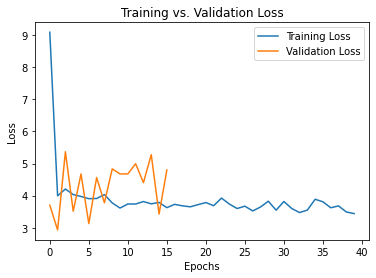

In [17]:
import matplotlib.pyplot as plt
# train_losses = [l.item() for l in train_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
print(len(val_losses))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

Ideally, both training and validation losses should decrease over time, with validation loss being somewhat close or slightly higher than the training loss. This suggests that the model is improving and generalizing well to unseen data. 

Please note that our toy language model isn't delivering strong performance. As previously mentioned, the model we constructed is considerably smaller compared to practical language models. Additionally, we only trained it for a single epoch. Given these factors, the outcome shouldn't be unexpected.

<h2>Evaluation</h2>

Perplexity is a measure used to quantify how effectively a probability distribution or probabilistic model predicts a sample. It gauges the model's level of "perplexity" or "surprise" when faced with the true distribution. In language modeling, perplexity serves as an indicator of model quality: a lower perplexity signifies superior predictive accuracy.

As I mentioned earlier, a language model acts as a probability distribution, estimating the likelihoods of various sentences in a specific language. In essence, every language has an associated probability distribution, though its exact nature remains unknown to us. Techniques like the N-gram method or deep learning allow us to approximate this distribution. When employing deep neural networks in this domain, the loss function used is cross entropy. This metric evaluates the difference between the true probability distribution, which is unknown, and the distribution predicted by the language model. When assessing a language model, our primary interest lies in its performance on unseen data—specifically, the sentences in the test set. A lower cross entropy indicates a model that's less "perplexed" and more certain in its predictions. Therefore, perplexity is defined as:

$$Perplexity = 2^L$$ where $L$ represents the cross-entropy loss

Please note that if the base of the logarithm used in the loss function is $e$, then the perplexity is calculated as $e^L$.

The following code snippets demonstrate how to evaluate our language model.

In [18]:
test_raw_text = get_raw_text_from_dataset(PennTreebank(split='test'))
test_dataset = PTBDataset(test_raw_text)
test_loader = DataLoader(test_dataset, batch_size=64)

In [19]:
def evaluate(model, test_loader, device='cpu'):
    """
    Evaluate the model's performance on the provided DataLoader.

    Args:
    - model (torch.nn.Module): The trained language model.
    - test_loader (torch.utils.data.DataLoader): DataLoader for the test set.
    - device (str): Device to use ('cpu' or 'cuda').

    Returns:
    - average_loss (float): The average cross-entropy loss on the test set.
    - accuracy (float): The accuracy of the model on the test set.
    """
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    correct_predictions = 0
    total_tokens = 0

    criterion = torch.nn.CrossEntropyLoss()

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)

            loss = criterion(outputs.view(-1, outputs.size(2)), targets.view(-1))
            total_loss += loss.item()

            # Calculate accuracy
            _, predicted = outputs.max(2)
            correct_predictions += (predicted == targets).sum().item()
            total_tokens += targets.numel()

    average_loss = total_loss / len(test_loader)
    accuracy = correct_predictions / total_tokens

    return average_loss, accuracy

In [20]:
loss, accuracy = evaluate(model, test_loader)
print(f'Evaluation - Loss: {loss}, Accuracy: {accuracy}')

Evaluation - Loss: 4.133694573380481, Accuracy: 0.3676947815897291


In [21]:
import torch
perplexity = torch.exp(torch.tensor(loss))
print(f'Perplexity: {perplexity.item()}')

Perplexity: 62.40807342529297


<h2>Summary</h2>

<ul>
    <li>A language model essentially represents a probability distribution, denoted as \(p(x_1, x_2, \dots, x_m)\).</li>
    <li>\(p(x_1, x_2, \dots, x_m)\) indicates the likelihood of observing a particular sequence of tokens.</li>
    <li>Utilizing the chain rule of probability, we can express \(p(x_1, x_2, \dots, x_m)\) as \(\prod_{i=1}^m p(x_i | x_1:i−1)\). This conditional probability allows us to generate tokens successively based on preceding tokens.</li>
    <li>While we don't possess this exact probability distribution, we can approximate it using deep neural networks.</li>
    <li>Fully connected neural networks aren't ideal for modeling sequences, which is why we initially construct our model using an LSTM layer.</li>
    <li>Although LSTMs and GRUs, which are variants of the vanilla RNN, emerged as solutions for sequence modeling, they possess inherent limitations, especially when dealing with long-distance dependencies. Additionally, RNNs process tokens sequentially and cannot do so in parallel.</li>
    <li>Transformers, on the other hand, excel at maintaining long-distance dependencies and can analyze tokens in parallel, thanks to the attention mechanism they employ at their core.</li>
</ul>


<h2>What's Next</h2>
<ul>
    <li>In the next post, I will explain the concept of <span style="background-color: yellow;">Mixture of Experts (MoEs)</span> and <span style="background-color: yellow;">Switch Transformers<span>.</li>
    <li>In that same post, I will demonstrate how to modify the model that we constructed earlier to incorporate MoE and Switch Transformers.</li>
    <li>Subsequently, in another post, I will explain how to evaluate a language model. In this post, I have just briefly explained perplexity.</li>
</ul>
